In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import arabic_reshaper
from bidi.algorithm import get_display

In [3]:
from pandas_profiling import ProfileReport

In [4]:
%config Completer.use_jedi = False

In [5]:
Df= pd.read_excel('tamheer.xlsx') #read data from excel file and assign to variable Df
Df

,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ الإضافة,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي,تاريخ الانهاء,تاريخ الانسحاب
0,ذكر,حائل,NaN,NaN,NaN,NaT,2018-12-16,2019-06-15,9089229,تم قبول العرض التدريبي,2018-12-15,5475617,مهندس كهربائي,بكالوريوس أو أعلى,شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم...,الشنان,حائل,إنشاء واصلاح قنوات الري والسقي وابراج تخزين ال...,NaT,NaN
1,NaN,NaN,NaN,الكيمياء الحيوية,البكالوريوس أو ما يعادلها,2018-12-24 22:30:27.657,2018-12-04,2019-06-03,9160086,الطلب ملغى,2018-11-03,5356175,أخصائي موارد بشرية فرع العاصمة المقدسة,بكالوريوس أو أعلى,هيئة الرقابة والتحقيق,NaN,NaN,الخدمات الجماعية والاجتماعية,2020-04-30,NaN
2,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-07-21 15:35:13.637,2018-09-16,2019-03-15,6553310,تم رفض الطلب,2017-12-22,4532024,سكرتارية- مكتبات,بكالوريوس أو أعلى,البنك السعودي البريطاني,NaN,NaN,المؤسسات المالية,2020-04-30,NaN
3,انثى,الرياض,الرياض,NaN,NaN,NaT,2018-12-31,2019-06-29,9065387,تم قبول العرض التدريبي,2018-12-05,5535855,تدريب على رأس العمل (أخصائي تسويق - وحدة رفع ا...,بكالوريوس أو أعلى,شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة,الدوادمي,الرياض,صيانة برمجيات وتصميم صفحات المواقع,NaT,NaN
4,انثى,الهفوف,المنطقة الشرقية,NaN,NaN,NaT,2019-01-01,2019-06-30,9204387,تم قبول العرض التدريبي,2018-12-31,5575818,أخصائي تسويق تجارة إلكترونية,بكالوريوس أو أعلى,مؤسسة لؤي علي الصالح التجارية,القطيف,المنطقة الشرقية,البيع بالتجزئة للمنسوجات والاقمشة بأنواعها ( ا...,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-12-12 18:53:31.963,2018-12-16,2019-06-15,9063949,تم إلغاء البرنامج,2018-12-12,5495619,مطلوب ممرض عام,بكالوريوس أو أعلى,مجمع إبتسامتي الماسية الطبي,NaN,NaN,الخدمات الصحية,2020-04-30,NaN
3952,NaN,NaN,NaN,هندسة حاسب,البكالوريوس أو ما يعادلها,2018-03-07 23:36:37.353,2018-03-08,2018-07-07,5165504,تم رفض الطلب,2018-02-28,4055852,أخصائي تدريب في الكلية التقنية,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,NaN,NaN,NaN,2020-04-30,NaN
3953,NaN,NaN,NaN,تقنية المختبرات الطبية,البكالوريوس أو ما يعادلها,2018-08-28 16:24:47.333,2018-08-29,2019-02-27,7079908,تم رفض الطلب,2018-08-27,4761304,اخصائي تصوير طبي,بكالوريوس أو أعلى,مجمع بصمة الزين الطبي,NaN,NaN,الخدمات الصحية,2020-04-30,NaN
3954,NaN,NaN,NaN,لغات وترجمة - انجليزي,البكالوريوس أو ما يعادلها,2018-12-23 13:38:34.177,2019-01-01,2019-06-30,9143625,تم إلغاء البرنامج,2018-06-26,5565755,مترجمة,بكالوريوس أو أعلى,NaN,NaN,NaN,NaN,2020-04-30,NaN


In [6]:
Df.info #to get information of Df

<bound method DataFrame.info of      الجنس المدينة          المنطقة                  التخصص  \
0      ذكر    حائل              NaN                     NaN   
1      NaN     NaN              NaN        الكيمياء الحيوية   
2      NaN     NaN              NaN              إدارة عامة   
3     انثى  الرياض           الرياض                     NaN   
4     انثى  الهفوف  المنطقة الشرقية                     NaN   
...    ...     ...              ...                     ...   
3951   NaN     NaN              NaN              إدارة عامة   
3952   NaN     NaN              NaN              هندسة حاسب   
3953   NaN     NaN              NaN  تقنية المختبرات الطبية   
3954   NaN     NaN              NaN   لغات وترجمة - انجليزي   
3955   NaN     NaN              NaN              تربية خاصة   

                         المؤهل           تاريخ الإضافة تاريخ بداية التدريب  \
0                           NaN                     NaT          2018-12-16   
1     البكالوريوس أو ما يعادلها 2018-12-24 22:30:27.6

In [7]:
Df.isnull().sum() # get sum of null data for each column

الجنس                     3934
المدينة                   3938
المنطقة                   3950
التخصص                      23
المؤهل                      22
تاريخ الإضافة               18
تاريخ بداية التدريب          0
تاريخ نهاية التدريب          0
رقم المتدرب                  0
حالة المتدرب                 0
تاريخ التسجيل               74
رقم الإعلان التدريبي         0
عنوان الإعلان التدريبي       0
المرحلة التعليمية            0
اسم المنشأة                 95
مدينة الإعلان التدريبي    3933
منطقة الاعلان التدريبي    3934
النشاط الاقتصادي           647
تاريخ الانهاء               58
تاريخ الانسحاب            3954
dtype: int64

In [8]:
print(Df.dropna(axis=0, how='all')) 
print(Df.dropna(axis=1, how='all'))

     الجنس المدينة          المنطقة                  التخصص  \
0      ذكر    حائل              NaN                     NaN   
1      NaN     NaN              NaN        الكيمياء الحيوية   
2      NaN     NaN              NaN              إدارة عامة   
3     انثى  الرياض           الرياض                     NaN   
4     انثى  الهفوف  المنطقة الشرقية                     NaN   
...    ...     ...              ...                     ...   
3951   NaN     NaN              NaN              إدارة عامة   
3952   NaN     NaN              NaN              هندسة حاسب   
3953   NaN     NaN              NaN  تقنية المختبرات الطبية   
3954   NaN     NaN              NaN   لغات وترجمة - انجليزي   
3955   NaN     NaN              NaN              تربية خاصة   

                         المؤهل           تاريخ الإضافة تاريخ بداية التدريب  \
0                           NaN                     NaT          2018-12-16   
1     البكالوريوس أو ما يعادلها 2018-12-24 22:30:27.657          2018-12-04   
2     

In [9]:
bs = Df[Df.duplicated()] #to get all duplicated records 
bs

,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ الإضافة,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي,تاريخ الانهاء,تاريخ الانسحاب
1325,NaN,NaN,NaN,طب أسنان,البكالوريوس أو ما يعادلها,2018-11-04 19:33:58.540,2018-11-20,2019-05-19,8544513,تم إلغاء البرنامج,2018-11-19,5105032,فرصة تدريبية طبيب اسنان عام,بكالوريوس أو أعلى,شركة ابراهيم عبدالله المهيدب للخدمات الطبية,NaN,NaN,الخدمات الصحية,2020-04-30,NaN
3745,NaN,NaN,NaN,لغات وترجمة - انجليزي,البكالوريوس أو ما يعادلها,2018-09-12 22:16:56.987,2018-09-13,2019-03-12,7405277,تم حفظ الطلب,2018-09-09,4869674,أخصائي تدريب,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,NaN,NaN,NaN,2020-04-30,NaN
3848,NaN,NaN,NaN,الرياضيات,البكالوريوس أو ما يعادلها,2018-09-24 14:17:09.193,2018-09-18,2019-03-17,7695948,تم حفظ الطلب,2018-09-11,4905299,أخصائي تدريب,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,NaN,NaN,NaN,2020-04-30,NaN


In [10]:
Df.drop_duplicates(inplace=True) #drop duplicated records from data frame

In [11]:
Df.head() #get first 5 records 

,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ الإضافة,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي,تاريخ الانهاء,تاريخ الانسحاب
0,ذكر,حائل,NaN,NaN,NaN,NaT,2018-12-16,2019-06-15,9089229,تم قبول العرض التدريبي,2018-12-15,5475617,مهندس كهربائي,بكالوريوس أو أعلى,شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم...,الشنان,حائل,إنشاء واصلاح قنوات الري والسقي وابراج تخزين ال...,NaT,NaN
1,NaN,NaN,NaN,الكيمياء الحيوية,البكالوريوس أو ما يعادلها,2018-12-24 22:30:27.657,2018-12-04,2019-06-03,9160086,الطلب ملغى,2018-11-03,5356175,أخصائي موارد بشرية فرع العاصمة المقدسة,بكالوريوس أو أعلى,هيئة الرقابة والتحقيق,NaN,NaN,الخدمات الجماعية والاجتماعية,2020-04-30,NaN
2,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-07-21 15:35:13.637,2018-09-16,2019-03-15,6553310,تم رفض الطلب,2017-12-22,4532024,سكرتارية- مكتبات,بكالوريوس أو أعلى,البنك السعودي البريطاني,NaN,NaN,المؤسسات المالية,2020-04-30,NaN
3,انثى,الرياض,الرياض,NaN,NaN,NaT,2018-12-31,2019-06-29,9065387,تم قبول العرض التدريبي,2018-12-05,5535855,تدريب على رأس العمل (أخصائي تسويق - وحدة رفع ا...,بكالوريوس أو أعلى,شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة,الدوادمي,الرياض,صيانة برمجيات وتصميم صفحات المواقع,NaT,NaN
4,انثى,الهفوف,المنطقة الشرقية,NaN,NaN,NaT,2019-01-01,2019-06-30,9204387,تم قبول العرض التدريبي,2018-12-31,5575818,أخصائي تسويق تجارة إلكترونية,بكالوريوس أو أعلى,مؤسسة لؤي علي الصالح التجارية,القطيف,المنطقة الشرقية,البيع بالتجزئة للمنسوجات والاقمشة بأنواعها ( ا...,NaT,NaN


In [12]:
Df.shape #get shape of data frame

(3953, 20)

In [13]:
Df.size #get size of data frame

79060

In [14]:
Df.describe() #overall describtion of data frame 

,رقم المتدرب,رقم الإعلان التدريبي,تاريخ الانسحاب
count,3.953000e+03,3.953000e+03,2.000000
mean,1.244931e+07,4.749704e+06,44046.000000
std,2.247186e+08,5.081862e+05,134.350288
min,3.388280e+06,2.802878e+06,43951.000000
25%,5.885173e+06,4.332939e+06,43998.500000
50%,7.554867e+06,4.890911e+06,44046.000000
75%,8.799805e+06,5.105032e+06,44093.500000
max,9.998740e+09,5.595618e+06,44141.000000


In [15]:
Df.isnull().values.sum() #count of all null values

24560

In [16]:
Df.drop('تاريخ الانسحاب', axis=1, inplace=True) #drop column 'تاريخ الانسحاب' because it is irrelevant
Df.drop('تاريخ الإضافة', axis=1, inplace=True) #drop column 'تاريخ الإضافة' because it is irrelevant
Df.drop('تاريخ الانهاء', axis=1, inplace=True) #drop column 'تاريخ الانهاء' because it is irrelevant
Df

,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي
0,ذكر,حائل,NaN,NaN,NaN,2018-12-16,2019-06-15,9089229,تم قبول العرض التدريبي,2018-12-15,5475617,مهندس كهربائي,بكالوريوس أو أعلى,شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم...,الشنان,حائل,إنشاء واصلاح قنوات الري والسقي وابراج تخزين ال...
1,NaN,NaN,NaN,الكيمياء الحيوية,البكالوريوس أو ما يعادلها,2018-12-04,2019-06-03,9160086,الطلب ملغى,2018-11-03,5356175,أخصائي موارد بشرية فرع العاصمة المقدسة,بكالوريوس أو أعلى,هيئة الرقابة والتحقيق,NaN,NaN,الخدمات الجماعية والاجتماعية
2,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-09-16,2019-03-15,6553310,تم رفض الطلب,2017-12-22,4532024,سكرتارية- مكتبات,بكالوريوس أو أعلى,البنك السعودي البريطاني,NaN,NaN,المؤسسات المالية
3,انثى,الرياض,الرياض,NaN,NaN,2018-12-31,2019-06-29,9065387,تم قبول العرض التدريبي,2018-12-05,5535855,تدريب على رأس العمل (أخصائي تسويق - وحدة رفع ا...,بكالوريوس أو أعلى,شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة,الدوادمي,الرياض,صيانة برمجيات وتصميم صفحات المواقع
4,انثى,الهفوف,المنطقة الشرقية,NaN,NaN,2019-01-01,2019-06-30,9204387,تم قبول العرض التدريبي,2018-12-31,5575818,أخصائي تسويق تجارة إلكترونية,بكالوريوس أو أعلى,مؤسسة لؤي علي الصالح التجارية,القطيف,المنطقة الشرقية,البيع بالتجزئة للمنسوجات والاقمشة بأنواعها ( ا...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-12-16,2019-06-15,9063949,تم إلغاء البرنامج,2018-12-12,5495619,مطلوب ممرض عام,بكالوريوس أو أعلى,مجمع إبتسامتي الماسية الطبي,NaN,NaN,الخدمات الصحية
3952,NaN,NaN,NaN,هندسة حاسب,البكالوريوس أو ما يعادلها,2018-03-08,2018-07-07,5165504,تم رفض الطلب,2018-02-28,4055852,أخصائي تدريب في الكلية التقنية,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,NaN,NaN,NaN
3953,NaN,NaN,NaN,تقنية المختبرات الطبية,البكالوريوس أو ما يعادلها,2018-08-29,2019-02-27,7079908,تم رفض الطلب,2018-08-27,4761304,اخصائي تصوير طبي,بكالوريوس أو أعلى,مجمع بصمة الزين الطبي,NaN,NaN,الخدمات الصحية
3954,NaN,NaN,NaN,لغات وترجمة - انجليزي,البكالوريوس أو ما يعادلها,2019-01-01,2019-06-30,9143625,تم إلغاء البرنامج,2018-06-26,5565755,مترجمة,بكالوريوس أو أعلى,NaN,NaN,NaN,NaN


In [17]:
Df = Df[Df['اسم المنشأة'].notna()] #delete row with null value from column 'اسم المنشأة'
Df

,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي
0,ذكر,حائل,NaN,NaN,NaN,2018-12-16,2019-06-15,9089229,تم قبول العرض التدريبي,2018-12-15,5475617,مهندس كهربائي,بكالوريوس أو أعلى,شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم...,الشنان,حائل,إنشاء واصلاح قنوات الري والسقي وابراج تخزين ال...
1,NaN,NaN,NaN,الكيمياء الحيوية,البكالوريوس أو ما يعادلها,2018-12-04,2019-06-03,9160086,الطلب ملغى,2018-11-03,5356175,أخصائي موارد بشرية فرع العاصمة المقدسة,بكالوريوس أو أعلى,هيئة الرقابة والتحقيق,NaN,NaN,الخدمات الجماعية والاجتماعية
2,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-09-16,2019-03-15,6553310,تم رفض الطلب,2017-12-22,4532024,سكرتارية- مكتبات,بكالوريوس أو أعلى,البنك السعودي البريطاني,NaN,NaN,المؤسسات المالية
3,انثى,الرياض,الرياض,NaN,NaN,2018-12-31,2019-06-29,9065387,تم قبول العرض التدريبي,2018-12-05,5535855,تدريب على رأس العمل (أخصائي تسويق - وحدة رفع ا...,بكالوريوس أو أعلى,شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة,الدوادمي,الرياض,صيانة برمجيات وتصميم صفحات المواقع
4,انثى,الهفوف,المنطقة الشرقية,NaN,NaN,2019-01-01,2019-06-30,9204387,تم قبول العرض التدريبي,2018-12-31,5575818,أخصائي تسويق تجارة إلكترونية,بكالوريوس أو أعلى,مؤسسة لؤي علي الصالح التجارية,القطيف,المنطقة الشرقية,البيع بالتجزئة للمنسوجات والاقمشة بأنواعها ( ا...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,NaN,NaN,NaN,تربية خاصة,البكالوريوس أو ما يعادلها,2018-07-02,2019-01-01,6290978,تم رفض الطلب,2018-06-29,4484372,مدرس تربية خاصة,بكالوريوس أو أعلى,مركز براعم التحدي لذوي الاعاقة,NaN,NaN,مراكز ذوي الاعاقة
3951,NaN,NaN,NaN,إدارة عامة,البكالوريوس أو ما يعادلها,2018-12-16,2019-06-15,9063949,تم إلغاء البرنامج,2018-12-12,5495619,مطلوب ممرض عام,بكالوريوس أو أعلى,مجمع إبتسامتي الماسية الطبي,NaN,NaN,الخدمات الصحية
3952,NaN,NaN,NaN,هندسة حاسب,البكالوريوس أو ما يعادلها,2018-03-08,2018-07-07,5165504,تم رفض الطلب,2018-02-28,4055852,أخصائي تدريب في الكلية التقنية,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,NaN,NaN,NaN
3953,NaN,NaN,NaN,تقنية المختبرات الطبية,البكالوريوس أو ما يعادلها,2018-08-29,2019-02-27,7079908,تم رفض الطلب,2018-08-27,4761304,اخصائي تصوير طبي,بكالوريوس أو أعلى,مجمع بصمة الزين الطبي,NaN,NaN,الخدمات الصحية


In [18]:
#change null value to 'غير محدد' for column 'الجنس, المدينة, المنطقة, التخصص, التخصص, المؤهل, منطقة الاعلان التدريبي, مدينة الإعلان التدريبي, النشاط الاقتصادي'
Df.loc[Df['الجنس'].isnull(), 'الجنس'] = 'غير محدد'
Df.loc[Df['المدينة'].isnull(), 'المدينة'] = 'غير محدد'
Df.loc[Df['المنطقة'].isnull(), 'المنطقة'] = 'غير محدد'
Df.loc[Df['التخصص'].isnull(), 'التخصص'] = 'غير محدد'
Df.loc[Df['المؤهل'].isnull(), 'المؤهل'] = 'غير محدد'
Df.loc[Df['منطقة الاعلان التدريبي'].isnull(), 'منطقة الاعلان التدريبي'] = 'غير محدد'
Df.loc[Df['مدينة الإعلان التدريبي'].isnull(), 'مدينة الإعلان التدريبي'] = 'غير محدد'
Df.loc[Df['النشاط الاقتصادي'].isnull(), 'النشاط الاقتصادي'] = 'غير محدد'
Df

,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي
0,ذكر,حائل,غير محدد,غير محدد,غير محدد,2018-12-16,2019-06-15,9089229,تم قبول العرض التدريبي,2018-12-15,5475617,مهندس كهربائي,بكالوريوس أو أعلى,شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم...,الشنان,حائل,إنشاء واصلاح قنوات الري والسقي وابراج تخزين ال...
1,غير محدد,غير محدد,غير محدد,الكيمياء الحيوية,البكالوريوس أو ما يعادلها,2018-12-04,2019-06-03,9160086,الطلب ملغى,2018-11-03,5356175,أخصائي موارد بشرية فرع العاصمة المقدسة,بكالوريوس أو أعلى,هيئة الرقابة والتحقيق,غير محدد,غير محدد,الخدمات الجماعية والاجتماعية
2,غير محدد,غير محدد,غير محدد,إدارة عامة,البكالوريوس أو ما يعادلها,2018-09-16,2019-03-15,6553310,تم رفض الطلب,2017-12-22,4532024,سكرتارية- مكتبات,بكالوريوس أو أعلى,البنك السعودي البريطاني,غير محدد,غير محدد,المؤسسات المالية
3,انثى,الرياض,الرياض,غير محدد,غير محدد,2018-12-31,2019-06-29,9065387,تم قبول العرض التدريبي,2018-12-05,5535855,تدريب على رأس العمل (أخصائي تسويق - وحدة رفع ا...,بكالوريوس أو أعلى,شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة,الدوادمي,الرياض,صيانة برمجيات وتصميم صفحات المواقع
4,انثى,الهفوف,المنطقة الشرقية,غير محدد,غير محدد,2019-01-01,2019-06-30,9204387,تم قبول العرض التدريبي,2018-12-31,5575818,أخصائي تسويق تجارة إلكترونية,بكالوريوس أو أعلى,مؤسسة لؤي علي الصالح التجارية,القطيف,المنطقة الشرقية,البيع بالتجزئة للمنسوجات والاقمشة بأنواعها ( ا...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,غير محدد,غير محدد,غير محدد,تربية خاصة,البكالوريوس أو ما يعادلها,2018-07-02,2019-01-01,6290978,تم رفض الطلب,2018-06-29,4484372,مدرس تربية خاصة,بكالوريوس أو أعلى,مركز براعم التحدي لذوي الاعاقة,غير محدد,غير محدد,مراكز ذوي الاعاقة
3951,غير محدد,غير محدد,غير محدد,إدارة عامة,البكالوريوس أو ما يعادلها,2018-12-16,2019-06-15,9063949,تم إلغاء البرنامج,2018-12-12,5495619,مطلوب ممرض عام,بكالوريوس أو أعلى,مجمع إبتسامتي الماسية الطبي,غير محدد,غير محدد,الخدمات الصحية
3952,غير محدد,غير محدد,غير محدد,هندسة حاسب,البكالوريوس أو ما يعادلها,2018-03-08,2018-07-07,5165504,تم رفض الطلب,2018-02-28,4055852,أخصائي تدريب في الكلية التقنية,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,غير محدد,غير محدد,غير محدد
3953,غير محدد,غير محدد,غير محدد,تقنية المختبرات الطبية,البكالوريوس أو ما يعادلها,2018-08-29,2019-02-27,7079908,تم رفض الطلب,2018-08-27,4761304,اخصائي تصوير طبي,بكالوريوس أو أعلى,مجمع بصمة الزين الطبي,غير محدد,غير محدد,الخدمات الصحية


In [19]:
#متوسط مدة التدريب لكل منطقة 
Df['مدة التدريب'] = Df['تاريخ نهاية التدريب'] - Df['تاريخ بداية التدريب']
Df

/var/folders/v5/64qqh7_506l7yf1j_8cplcvm0000gn/T/ipykernel_10311/3331721156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['مدة التدريب'] = Df['تاريخ نهاية التدريب'] - Df['تاريخ بداية التدريب']


,الجنس,المدينة,المنطقة,التخصص,المؤهل,تاريخ بداية التدريب,تاريخ نهاية التدريب,رقم المتدرب,حالة المتدرب,تاريخ التسجيل,رقم الإعلان التدريبي,عنوان الإعلان التدريبي,المرحلة التعليمية,اسم المنشأة,مدينة الإعلان التدريبي,منطقة الاعلان التدريبي,النشاط الاقتصادي,مدة التدريب
0,ذكر,حائل,غير محدد,غير محدد,غير محدد,2018-12-16,2019-06-15,9089229,تم قبول العرض التدريبي,2018-12-15,5475617,مهندس كهربائي,بكالوريوس أو أعلى,شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم...,الشنان,حائل,إنشاء واصلاح قنوات الري والسقي وابراج تخزين ال...,181 days
1,غير محدد,غير محدد,غير محدد,الكيمياء الحيوية,البكالوريوس أو ما يعادلها,2018-12-04,2019-06-03,9160086,الطلب ملغى,2018-11-03,5356175,أخصائي موارد بشرية فرع العاصمة المقدسة,بكالوريوس أو أعلى,هيئة الرقابة والتحقيق,غير محدد,غير محدد,الخدمات الجماعية والاجتماعية,181 days
2,غير محدد,غير محدد,غير محدد,إدارة عامة,البكالوريوس أو ما يعادلها,2018-09-16,2019-03-15,6553310,تم رفض الطلب,2017-12-22,4532024,سكرتارية- مكتبات,بكالوريوس أو أعلى,البنك السعودي البريطاني,غير محدد,غير محدد,المؤسسات المالية,180 days
3,انثى,الرياض,الرياض,غير محدد,غير محدد,2018-12-31,2019-06-29,9065387,تم قبول العرض التدريبي,2018-12-05,5535855,تدريب على رأس العمل (أخصائي تسويق - وحدة رفع ا...,بكالوريوس أو أعلى,شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة,الدوادمي,الرياض,صيانة برمجيات وتصميم صفحات المواقع,180 days
4,انثى,الهفوف,المنطقة الشرقية,غير محدد,غير محدد,2019-01-01,2019-06-30,9204387,تم قبول العرض التدريبي,2018-12-31,5575818,أخصائي تسويق تجارة إلكترونية,بكالوريوس أو أعلى,مؤسسة لؤي علي الصالح التجارية,القطيف,المنطقة الشرقية,البيع بالتجزئة للمنسوجات والاقمشة بأنواعها ( ا...,180 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,غير محدد,غير محدد,غير محدد,تربية خاصة,البكالوريوس أو ما يعادلها,2018-07-02,2019-01-01,6290978,تم رفض الطلب,2018-06-29,4484372,مدرس تربية خاصة,بكالوريوس أو أعلى,مركز براعم التحدي لذوي الاعاقة,غير محدد,غير محدد,مراكز ذوي الاعاقة,183 days
3951,غير محدد,غير محدد,غير محدد,إدارة عامة,البكالوريوس أو ما يعادلها,2018-12-16,2019-06-15,9063949,تم إلغاء البرنامج,2018-12-12,5495619,مطلوب ممرض عام,بكالوريوس أو أعلى,مجمع إبتسامتي الماسية الطبي,غير محدد,غير محدد,الخدمات الصحية,181 days
3952,غير محدد,غير محدد,غير محدد,هندسة حاسب,البكالوريوس أو ما يعادلها,2018-03-08,2018-07-07,5165504,تم رفض الطلب,2018-02-28,4055852,أخصائي تدريب في الكلية التقنية,بكالوريوس أو أعلى,المؤسسة العامة للتدريب التقني والمهني,غير محدد,غير محدد,غير محدد,121 days
3953,غير محدد,غير محدد,غير محدد,تقنية المختبرات الطبية,البكالوريوس أو ما يعادلها,2018-08-29,2019-02-27,7079908,تم رفض الطلب,2018-08-27,4761304,اخصائي تصوير طبي,بكالوريوس أو أعلى,مجمع بصمة الزين الطبي,غير محدد,غير محدد,الخدمات الصحية,182 days


In [20]:
mean_days = Df.groupby(['منطقة الاعلان التدريبي'])['مدة التدريب'].mean().sort_values()
mean_days

منطقة الاعلان التدريبي
غير محدد          173 days 10:02:30.156412930
المدينة المنورة             180 days 00:00:00
جازان                       180 days 00:00:00
مكة المكرمة                 180 days 12:00:00
المنطقة الشرقية             180 days 14:24:00
الرياض                      180 days 21:20:00
حائل                        181 days 00:00:00
Name: مدة التدريب, dtype: timedelta64[ns]

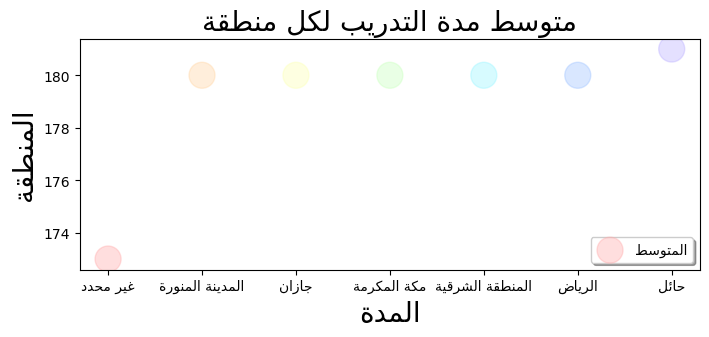

In [21]:
cs =np.array(['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF'])
colors = cs[0:7]
region = [get_display(arabic_reshaper.reshape('غير محدد'))
          , get_display(arabic_reshaper.reshape('المدينة المنورة'))
          , get_display(arabic_reshaper.reshape('جازان'))
          , get_display(arabic_reshaper.reshape('مكة المكرمة'))
          , get_display(arabic_reshaper.reshape('المنطقة الشرقية'))
          , get_display(arabic_reshaper.reshape('الرياض'))
          , get_display(arabic_reshaper.reshape('حائل'))]
mean = [173, 180, 180, 180, 180, 180, 181]
plt.figure(figsize=(8,3))
plt.scatter(region,mean, alpha= 0.4, s=350, color=colors) 
plt.title(get_display(arabic_reshaper.reshape('متوسط مدة التدريب لكل منطقة')),fontsize = 20)
plt.xlabel(get_display(arabic_reshaper.reshape('المدة')),fontsize = 20)
plt.ylabel(get_display(arabic_reshaper.reshape('المنطقة')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('المتوسط'))], shadow = True, loc = 'lower right')
plt.show()

In [22]:
#عدد المتدربين من كل نوع 
Df.groupby('الجنس').count()['مدة التدريب']

الجنس
انثى          19
ذكر            3
غير محدد    3836
Name: مدة التدريب, dtype: int64

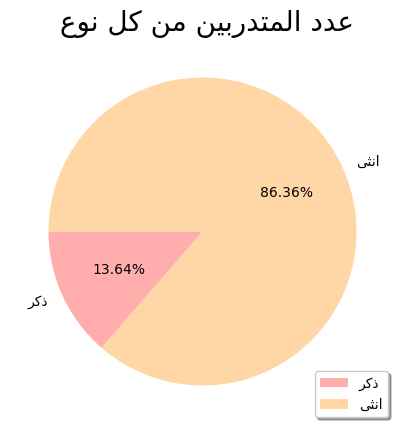

In [23]:
g_value = [3,19]
colors = cs[0:2]
gender=[get_display(arabic_reshaper.reshape('ذكر'))
        ,get_display(arabic_reshaper.reshape('انثى'))]
plt.figure(figsize=(8,5))
plt.pie(g_value,labels=gender, autopct='%1.2f%%', colors =colors,  startangle=180, radius=1)
plt.title(get_display(arabic_reshaper.reshape('عدد المتدربين من كل نوع ')),fontsize = 20)
plt.legend(gender, shadow = True, loc = 'lower right')
plt.show()

In [24]:
Df.columns

Index(['الجنس', 'المدينة', 'المنطقة', 'التخصص', 'المؤهل',
       'تاريخ بداية التدريب', 'تاريخ نهاية التدريب', 'رقم المتدرب',
       'حالة المتدرب', 'تاريخ التسجيل', 'رقم الإعلان التدريبي',
       'عنوان الإعلان التدريبي', 'المرحلة التعليمية', 'اسم المنشأة',
       'مدينة الإعلان التدريبي', 'منطقة الاعلان التدريبي', 'النشاط الاقتصادي',
       'مدة التدريب'],
      dtype='object')

In [25]:
Df['حالة المتدرب'].value_counts() #مجموع الاشخاص لكل حاله

تم رفض الطلب                 2052
الطلب ملغى                    745
تم حفظ الطلب                  609
تم إلغاء البرنامج             145
مكتمل                         142
انتهت صلاحية العرض            101
متقدم                          26
تم قبول العرض التدريبي         19
تم جدولة المقابلة الشخصية       7
غير مكتمل                       4
ملغى                            2
تم رفض المقابلة الشخصية         1
دعوة                            1
منسحب                           1
متدرب تمهير                     1
قيد المراجعة                    1
تم سحب العرض                    1
Name: حالة المتدرب, dtype: int64

In [26]:
Df['المدينة'].value_counts() 

غير محدد           3840
الرياض                7
الدمام                2
المدينة المنورة       2
جدة                   2
حائل                  1
الهفوف                1
المبرز                1
صامطة                 1
ابو عريش              1
Name: المدينة, dtype: int64

In [27]:
for name in Df['المدينة'].unique():
  print(name)
  print(Df['حالة المتدرب'][Df['المدينة'] == name].value_counts()) #

حائل
تم قبول العرض التدريبي    1
Name: حالة المتدرب, dtype: int64
غير محدد
تم رفض الطلب                 2052
الطلب ملغى                    745
تم حفظ الطلب                  609
تم إلغاء البرنامج             145
مكتمل                         142
انتهت صلاحية العرض            101
متقدم                          26
تم جدولة المقابلة الشخصية       7
تم قبول العرض التدريبي          4
غير مكتمل                       4
قيد المراجعة                    1
متدرب تمهير                     1
دعوة                            1
تم رفض المقابلة الشخصية         1
تم سحب العرض                    1
Name: حالة المتدرب, dtype: int64
الرياض
تم قبول العرض التدريبي    6
ملغى                      1
Name: حالة المتدرب, dtype: int64
الهفوف
تم قبول العرض التدريبي    1
Name: حالة المتدرب, dtype: int64
المبرز
تم قبول العرض التدريبي    1
Name: حالة المتدرب, dtype: int64
الدمام
تم قبول العرض التدريبي    2
Name: حالة المتدرب, dtype: int64
صامطة
ملغى    1
Name: حالة المتدرب, dtype: int64
المدينة المنورة
تم قبول العرض الت

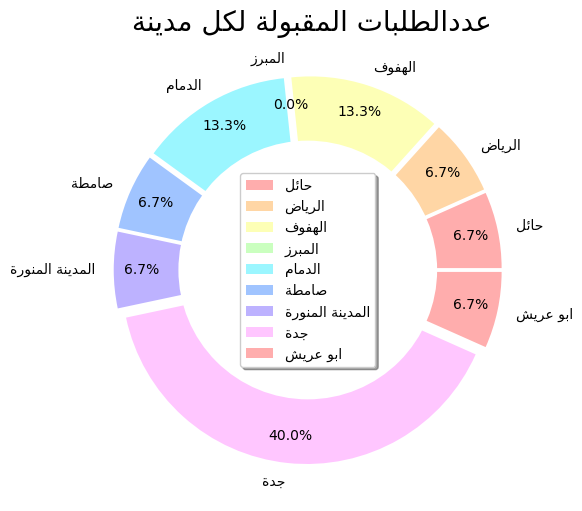

In [30]:
name=[get_display(arabic_reshaper.reshape('حائل'))
      ,get_display(arabic_reshaper.reshape('الرياض'))
      ,get_display(arabic_reshaper.reshape('الهفوف'))
      ,get_display(arabic_reshaper.reshape('المبرز'))
      ,get_display(arabic_reshaper.reshape('الدمام'))
      ,get_display(arabic_reshaper.reshape('صامطة'))
      ,get_display(arabic_reshaper.reshape('المدينة المنورة'))
      ,get_display(arabic_reshaper.reshape('جدة'))
      ,get_display(arabic_reshaper.reshape('ابو عريش'))]
acceptance=[1,1,2,0,2,1,1,6,1]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(9,6))
plt.pie(acceptance, colors=cs, labels=name,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode)
plt.title(get_display(arabic_reshaper.reshape('عددالطلبات المقبولة لكل مدينة ')),fontsize = 20)
plt.legend(name, shadow = True, loc = 'center')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

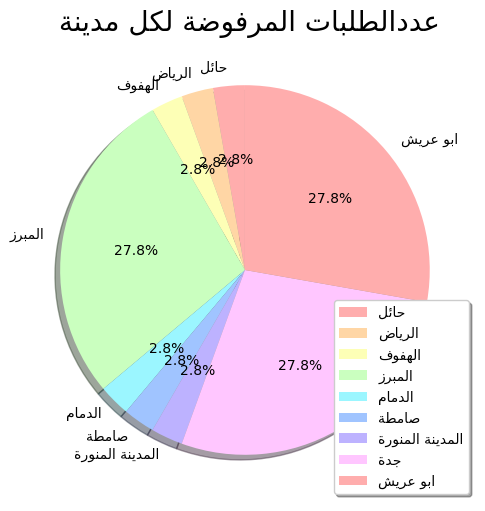

In [29]:
name=[get_display(arabic_reshaper.reshape('حائل'))
      ,get_display(arabic_reshaper.reshape('الرياض'))
      ,get_display(arabic_reshaper.reshape('الهفوف'))
      ,get_display(arabic_reshaper.reshape('المبرز'))
      ,get_display(arabic_reshaper.reshape('الدمام'))
      ,get_display(arabic_reshaper.reshape('صامطة'))
      ,get_display(arabic_reshaper.reshape('المدينة المنورة'))
      ,get_display(arabic_reshaper.reshape('جدة'))
      ,get_display(arabic_reshaper.reshape('ابو عريش'))]
Rejected=[0.1,0.1,0.1,1,0.1,0.1,0.1,1,1]
plt.figure(figsize=(9,6))
plt.pie(Rejected,labels=name, autopct='%1.1f%%',colors =cs ,startangle=90, shadow=True,
        radius=1)
plt.title(get_display(arabic_reshaper.reshape('عددالطلبات المرفوضة لكل مدينة ')),fontsize = 20)
plt.legend(name, shadow = True, loc = 'lower right')


plt.show()

In [31]:
for name in Df['المدينة'].unique():
  print(name)
  print(Df['المرحلة التعليمية'][Df['المدينة'] == name].value_counts())

حائل
بكالوريوس أو أعلى    1
Name: المرحلة التعليمية, dtype: int64
غير محدد
بكالوريوس أو أعلى    3840
Name: المرحلة التعليمية, dtype: int64
الرياض
بكالوريوس أو أعلى    7
Name: المرحلة التعليمية, dtype: int64
الهفوف
بكالوريوس أو أعلى    1
Name: المرحلة التعليمية, dtype: int64
المبرز
بكالوريوس أو أعلى    1
Name: المرحلة التعليمية, dtype: int64
الدمام
بكالوريوس أو أعلى    2
Name: المرحلة التعليمية, dtype: int64
صامطة
بكالوريوس أو أعلى    1
Name: المرحلة التعليمية, dtype: int64
المدينة المنورة
بكالوريوس أو أعلى    2
Name: المرحلة التعليمية, dtype: int64
جدة
بكالوريوس أو أعلى    2
Name: المرحلة التعليمية, dtype: int64
ابو عريش
بكالوريوس أو أعلى    1
Name: المرحلة التعليمية, dtype: int64


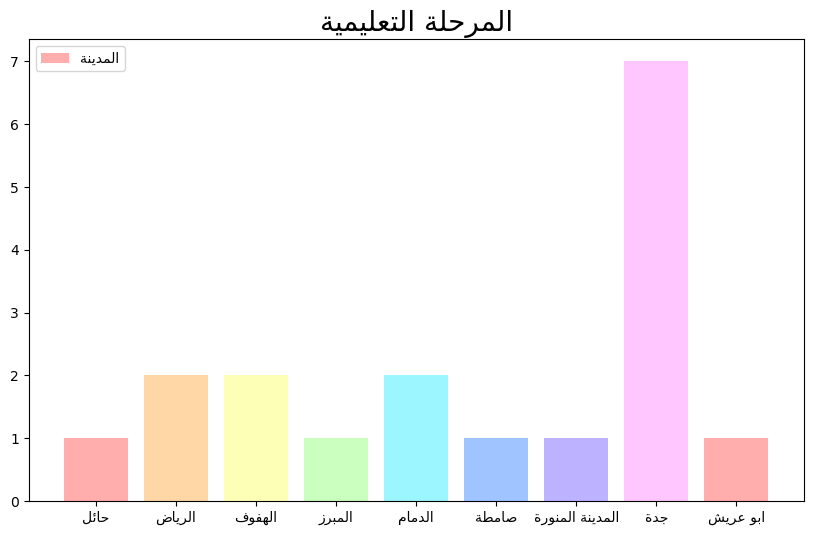

In [33]:
name=[get_display(arabic_reshaper.reshape('حائل'))
      ,get_display(arabic_reshaper.reshape('الرياض'))
      ,get_display(arabic_reshaper.reshape('الهفوف'))
      ,get_display(arabic_reshaper.reshape('المبرز'))
      ,get_display(arabic_reshaper.reshape('الدمام'))
      ,get_display(arabic_reshaper.reshape('صامطة'))
      ,get_display(arabic_reshaper.reshape('المدينة المنورة'))
      ,get_display(arabic_reshaper.reshape('جدة'))
      ,get_display(arabic_reshaper.reshape('ابو عريش'))]
Bachelors=[1,2,2,1,2,1,1,7,1]
plt.figure(figsize=(10,6))
plt.bar(name,Bachelors, color=cs)
plt.title(get_display(arabic_reshaper.reshape('المرحلة التعليمية')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('المدينة'))], loc='upper left')

plt.show()

In [34]:
Df['حالة المتدرب'].value_counts()

تم رفض الطلب                 2052
الطلب ملغى                    745
تم حفظ الطلب                  609
تم إلغاء البرنامج             145
مكتمل                         142
انتهت صلاحية العرض            101
متقدم                          26
تم قبول العرض التدريبي         19
تم جدولة المقابلة الشخصية       7
غير مكتمل                       4
ملغى                            2
تم رفض المقابلة الشخصية         1
دعوة                            1
منسحب                           1
متدرب تمهير                     1
قيد المراجعة                    1
تم سحب العرض                    1
Name: حالة المتدرب, dtype: int64

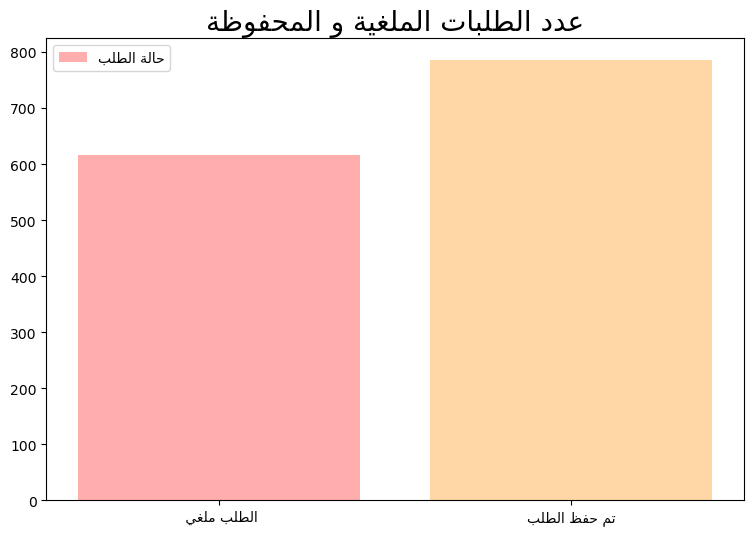

In [35]:
status=[get_display(arabic_reshaper.reshape('الطلب ملغي '))
        ,get_display(arabic_reshaper.reshape('تم حفظ الطلب')) ]
num=[617,785]
colors = cs[0:2]
plt.figure(figsize=(9,6))
plt.bar(status,num, color= colors)
plt.title(get_display(arabic_reshaper.reshape('عدد الطلبات الملغية و المحفوظة')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('حالة الطلب'))], loc='upper left')
plt.show()

In [36]:
for name in Df['اسم المنشأة'].unique():
  print(name)
  print(Df['حالة المتدرب'][Df['اسم المنشأة'] == name].value_counts())

شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم معجل المعجل و
تم قبول العرض التدريبي    1
Name: حالة المتدرب, dtype: int64
هيئة الرقابة والتحقيق
الطلب ملغى           135
تم رفض الطلب          57
تم حفظ الطلب          18
مكتمل                  8
تم إلغاء البرنامج      6
Name: حالة المتدرب, dtype: int64
البنك السعودي البريطاني
تم رفض الطلب              88
تم حفظ الطلب              23
الطلب ملغى                 6
تم إلغاء البرنامج          3
مكتمل                      3
تم قبول العرض التدريبي     1
Name: حالة المتدرب, dtype: int64
شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة
تم رفض الطلب              23
الطلب ملغى                 8
تم قبول العرض التدريبي     3
تم حفظ الطلب               3
تم إلغاء البرنامج          2
Name: حالة المتدرب, dtype: int64
مؤسسة لؤي علي الصالح التجارية
تم قبول العرض التدريبي    3
Name: حالة المتدرب, dtype: int64
شركة تشريفات المحدودة
تم رفض الطلب              11
تم إلغاء البرنامج          2
تم حفظ الطلب               2
تم قبول العرض التدريبي     1
الطلب ملغى      

تم رفض الطلب         11
تم حفظ الطلب          9
تم إلغاء البرنامج     2
مكتمل                 1
Name: حالة المتدرب, dtype: int64
الشركة المتحدة للسيارات المحدودة
تم رفض الطلب         14
تم إلغاء البرنامج     2
تم حفظ الطلب          2
Name: حالة المتدرب, dtype: int64
شركة الكفاح العقارية شركة شخص واحد
الطلب ملغى    1
Name: حالة المتدرب, dtype: int64
هيئة تنمية الصادرات السعودية
تم رفض الطلب    14
تم حفظ الطلب     7
الطلب ملغى       3
Name: حالة المتدرب, dtype: int64
الخليج المتقدمه للاستشارات الهندسية
تم رفض الطلب    3
Name: حالة المتدرب, dtype: int64
مركزتعافي لرعاية ذوي الإحتياجات الخاصة
تم رفض الطلب    2
تم حفظ الطلب    1
Name: حالة المتدرب, dtype: int64
مؤسسة الفكره الامثل لتقنية المعدات الطبية
تم رفض الطلب         5
تم حفظ الطلب         1
تم إلغاء البرنامج    1
مكتمل                1
Name: حالة المتدرب, dtype: int64
شركة خط الروابط لتقنية المعلومات
تم رفض الطلب    7
الطلب ملغى      2
Name: حالة المتدرب, dtype: int64
شركة دور للضيافة
تم رفض الطلب         15
تم إلغاء البرنامج     3
ا

الطلب ملغى    3
Name: حالة المتدرب, dtype: int64
شركة ديارات التجارية
تم رفض الطلب    2
Name: حالة المتدرب, dtype: int64
مكتب عبدالحكيم عبدالله سعد الخرجي للمحاماة
تم رفض الطلب          5
الطلب ملغى            5
تم حفظ الطلب          4
انتهت صلاحية العرض    1
Name: حالة المتدرب, dtype: int64
وخم للمقاولات
الطلب ملغى    2
Name: حالة المتدرب, dtype: int64
مجمع ابتسامة النجوم الطبي المتخصص
تم رفض الطلب    1
Name: حالة المتدرب, dtype: int64
شركة المناهل الاهليه المحدوده لتحفيظ القران قسم ابتدائي
الطلب ملغى    1
Name: حالة المتدرب, dtype: int64
تنمية انسان للرعاية النهارية
الطلب ملغى      2
تم رفض الطلب    1
Name: حالة المتدرب, dtype: int64
مجمع الجودة الطبي المتخصص في طب الاسنان
تم رفض الطلب    2
الطلب ملغى      2
تم حفظ الطلب    1
مكتمل           1
Name: حالة المتدرب, dtype: int64
شركة النوادي اللياقية المحدودة
تم رفض الطلب         6
تم حفظ الطلب         2
الطلب ملغى           2
تم إلغاء البرنامج    1
Name: حالة المتدرب, dtype: int64
مدارس المنابر الاهلية للبنات خيرية الطبجي
تم حفظ الطلب 

تم حفظ الطلب    1
Name: حالة المتدرب, dtype: int64
910003402
تم رفض الطلب    1
Name: حالة المتدرب, dtype: int64


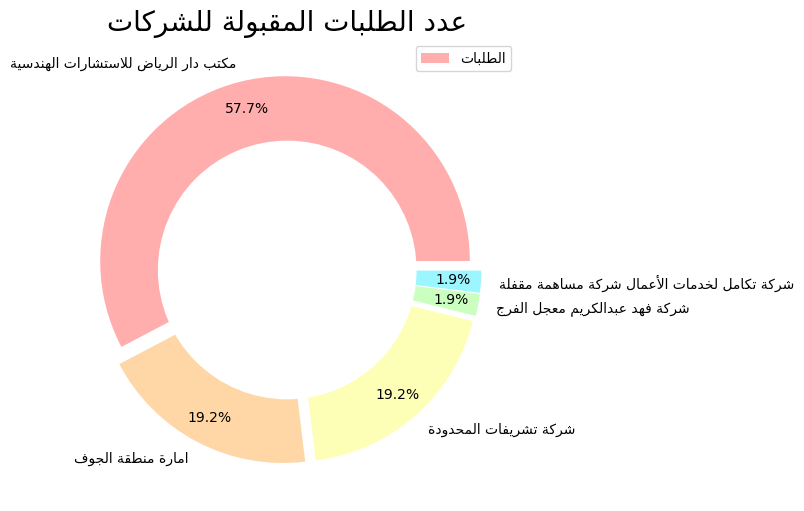

In [37]:
name_ins=[get_display(arabic_reshaper.reshape('مكتب دار الرياض للاستشارات الهندسية'))
      ,get_display(arabic_reshaper.reshape('امارة منطقة الجوف'))
      ,get_display(arabic_reshaper.reshape('شركة تشريفات المحدودة'))
      ,get_display(arabic_reshaper.reshape('شركة فهد عبدالكريم معجل الفرج'))
      ,get_display(arabic_reshaper.reshape('شركة تكامل لخدمات الأعمال شركة مساهمة مقفلة'))]
acceptance=[3,1,1,0.1,0.1]
colors = cs[0:5]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(9,6))
plt.pie(acceptance, colors=colors, labels=name_ins,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode)
plt.title(get_display(arabic_reshaper.reshape('عدد الطلبات المقبولة للشركات')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('الطلبات'))], loc='upper right')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

In [38]:
for name in Df['اسم المنشأة'].unique():
  print(name)
  print(Df['عنوان الإعلان التدريبي'][Df['اسم المنشأة'] == name])

شركة فهد عبدالكريم معجل الفرج و ناصر عبدالكريم معجل المعجل و
0    مهندس كهربائي 
Name: عنوان الإعلان التدريبي, dtype: object
هيئة الرقابة والتحقيق
1       أخصائي موارد بشرية فرع العاصمة المقدسة
20                                 مساعد اداري
32                                 مساعد اداري
81                                 مساعد اداري
91                            محقق فرع القريات
                         ...                  
3862                          محقق فرع الشرقية
3906                          محقق فرع الشرقية
3925                          محقق فرع الشرقية
3935                         محقق فرع الدوادمي
3944                          محقق فرع الشرقية
Name: عنوان الإعلان التدريبي, Length: 224, dtype: object
البنك السعودي البريطاني
2                 سكرتارية- مكتبات
30               ممثل خدمة العملاء
80                IT Qualit Tester
97              أخصائي موارد بشرية
173                    مساعد اداري
                   ...            
3829                         مترجم
3882    Re

475          اختصاصي تسويق
552          اختصاصي تسويق
698                 مبيعات
804                 مبيعات
1380                مبيعات
1492                مبيعات
1845     اداري موارد بشرية
2171                مبيعات
2864     اداري موارد بشرية
3085         اختصاصي تسويق
3116    مصمم دعاية و إعلان
Name: عنوان الإعلان التدريبي, dtype: object
مدارس ومعاهد الشرق الأهلية
479            معلم ابتدائي
732              منسق اداري
1115          معلم حاسب الي
1237             منسق إداري
1428             منسق إداري
1857             مشرفة نشاط
2063             منسق إداري
2427           معلم ابتدائي
2508             مشرفة نشاط
3400    معلم تربية اسلامية 
3402             منسق إداري
3411    معلم تربية اسلامية 
3673             منسق إداري
3870             منسق إداري
Name: عنوان الإعلان التدريبي, dtype: object
المصنع السعودي للسيور
487     منسقة تسويق
1776    منسقة تسويق
Name: عنوان الإعلان التدريبي, dtype: object
شركة اتحاد الاتصالات
490        أخصائي موارد بشرية
563        أخصائي موارد بشرية
617      

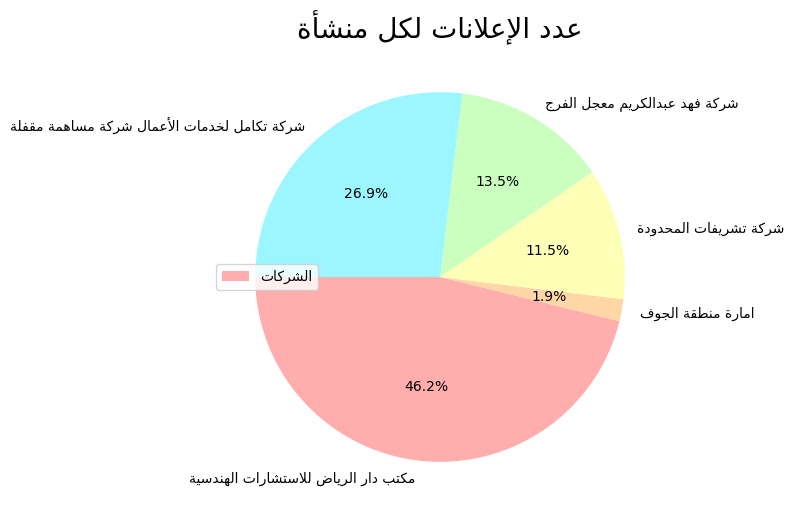

In [39]:
num=[24,1,6,7,14]

#add colors
colors = cs[0:5]
plt.figure(figsize=(9,6))
plt.pie(num,labels=name_ins, autopct='%1.1f%%', colors =colors,  startangle=180, radius=1)
plt.title(get_display(arabic_reshaper.reshape('عدد الإعلانات لكل منشأة')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('الشركات'))], loc='center left')
plt.show()

In [40]:
print(Df['عنوان الإعلان التدريبي'][Df['منطقة الاعلان التدريبي'] == 'جازان'].value_counts())

ابو عريش        2
معلمة كيمياء    1
Name: عنوان الإعلان التدريبي, dtype: int64


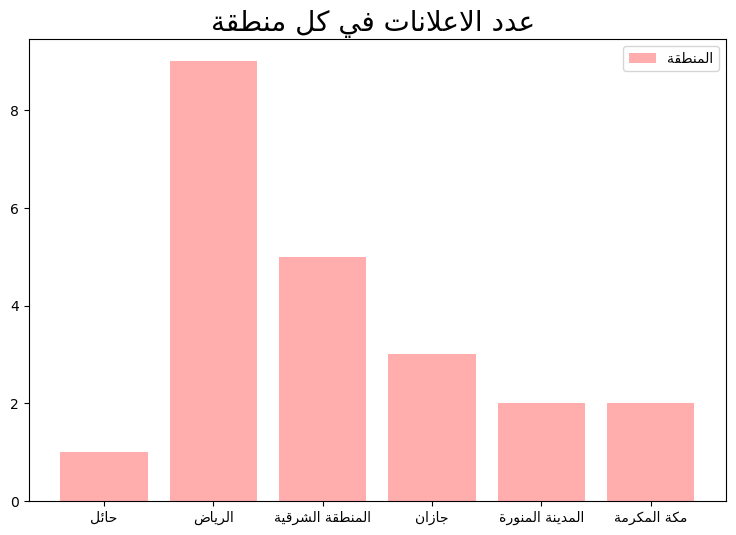

In [41]:
# جلب عدد الاعلانات لكل منطقة
adTown = {}
for name in Df['منطقة الاعلان التدريبي'].unique():
    if name != 'غير محدد':
      if [Df['منطقة الاعلان التدريبي'] == name]:
        adNum = Df['عنوان الإعلان التدريبي'][Df['منطقة الاعلان التدريبي'] == name].value_counts().sum()
        adTown[get_display(arabic_reshaper.reshape(name))] = adNum
      
towns = list(adTown.keys())
ads = list(adTown.values())
plt.figure(figsize=(9,6))
plt.bar(towns,ads, color=cs[0])
plt.title(get_display(arabic_reshaper.reshape(' عدد الاعلانات في كل منطقة')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('المنطقة'))], loc='upper right')
plt.show()

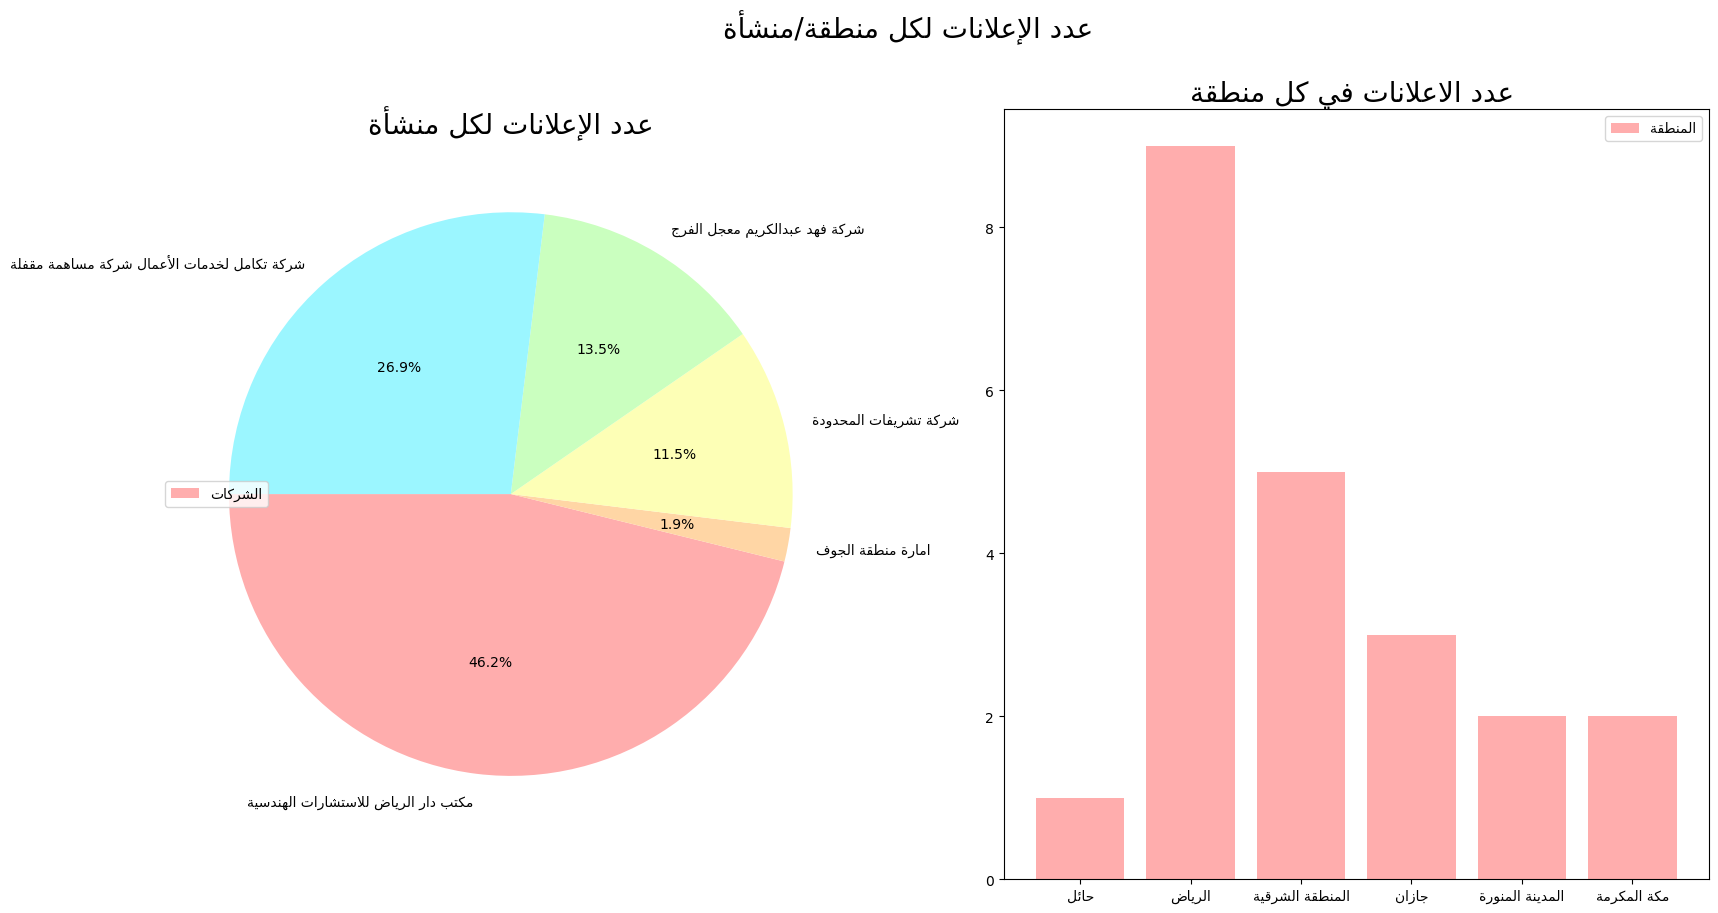

In [42]:
#super title = عدد الإعلانات لكل منطقة/منشأة
plt.figure(figsize=[20,10])
plt.suptitle(get_display(arabic_reshaper.reshape('عدد الإعلانات لكل منطقة/منشأة')),fontsize = 20)
#title = First Chart
plt.subplot(1,2,1) #(number of rows, number of columns, number of plot)
colors = cs[0:5]
plt.pie(num,labels=name_ins, autopct='%1.1f%%', colors =colors,  startangle=180, radius=1)
plt.title(get_display(arabic_reshaper.reshape('عدد الإعلانات لكل منشأة')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('الشركات'))], loc='center left')
#title = Second Chart
plt.subplot(1,2,2) #(number of rows, number of columns, number of plot)
plt.bar(towns,ads, color=cs[0])
plt.title(get_display(arabic_reshaper.reshape(' عدد الاعلانات في كل منطقة')),fontsize = 20)
plt.legend([get_display(arabic_reshaper.reshape('المنطقة'))], loc='upper right')


In [43]:
profile = ProfileReport(Df, title="Pandas Profiling Report")

In [44]:
profile.to_widgets()

/Users/amjaadb/opt/anaconda3/lib/python3.9/site-packages/multimethod/__init__.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self[tuple(map(self.get_type, args))](*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
profile.to_file("tamheer.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]